In [25]:
import requests
from PIL import Image
from io import BytesIO

In [26]:
def download_img(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

In [27]:
im1 = download_img('https://cdn.pixabay.com/photo/2015/04/23/22/00/tree-736885__480.jpg')
im1.save('image1.png')


In [28]:
im2 = Image.open(r"C:\Users\Pc\Desktop\book img.jpg")
im2.size

(248, 203)

In [29]:
im1.show

<bound method Image.show of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=771x480 at 0x1A8D81299A0>>

In [30]:
im2.show()

In [31]:
im2.info

{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}

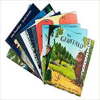

In [32]:
# resize image
im2.resize((100,100))

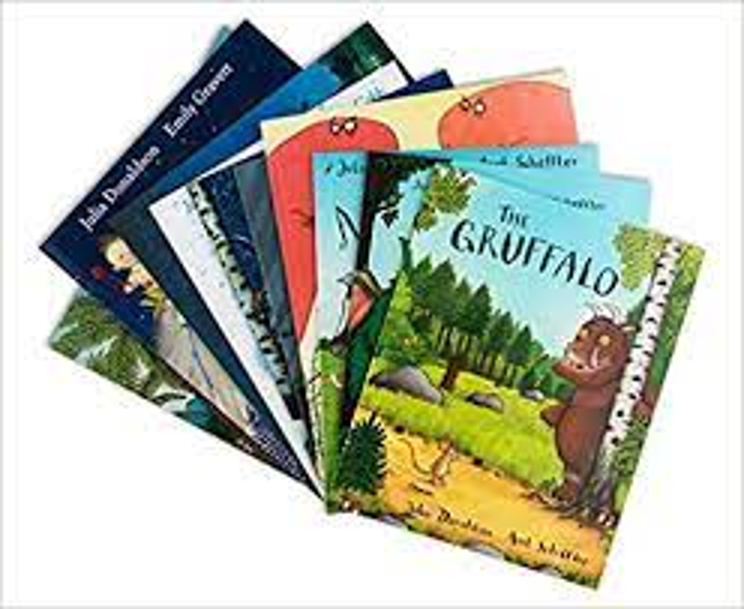

In [33]:
im2.resize((3* im2.width, 3* im2.height))

In [34]:
from email.mime import image

im2.resize((im2.width//3, im2.height//3)).save('image3.png')

In [35]:
from PIL import ImageDraw, ImageFont

In [36]:
drawIm2 = ImageDraw.Draw(im2)
drawIm2.text((20,20))

TypeError: text() missing 1 required positional argument: 'text'

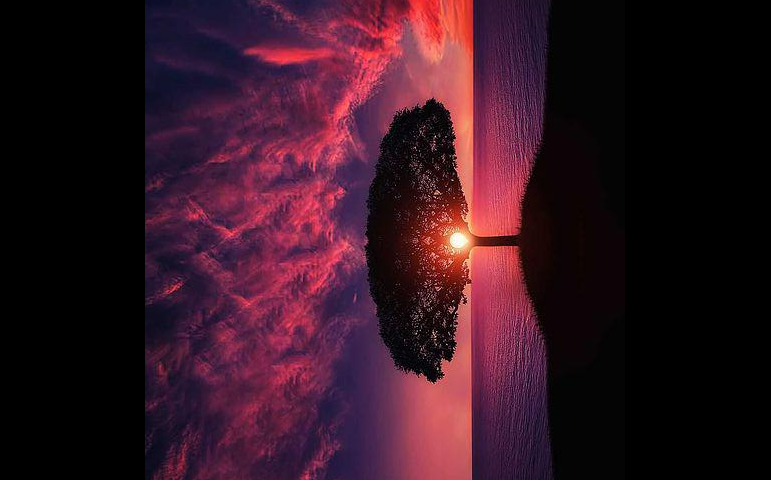

In [ ]:
im1.rotate(90)

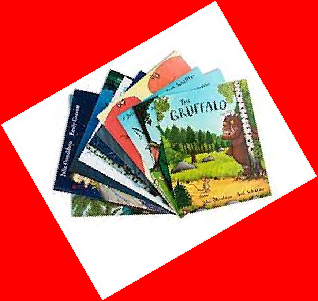

In [ ]:
im2.rotate(30, expand=True, fillcolor='red').save('book2.png')

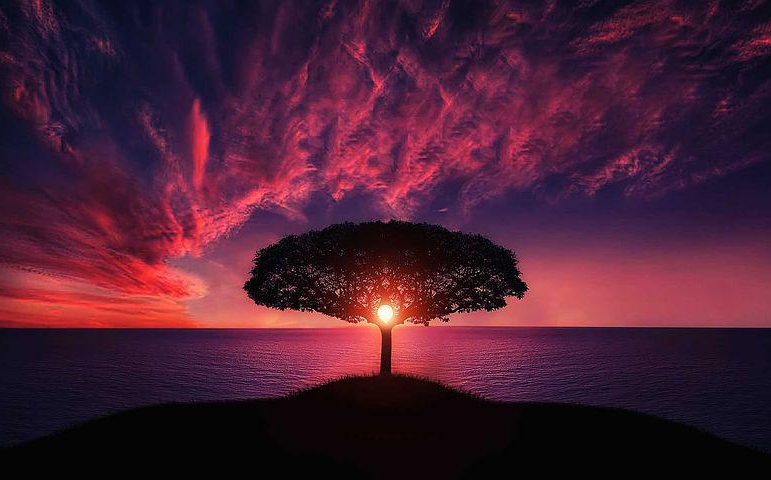

In [ ]:
im1.transpose(Image.Transpose.FLIP_LEFT_RIGHT)

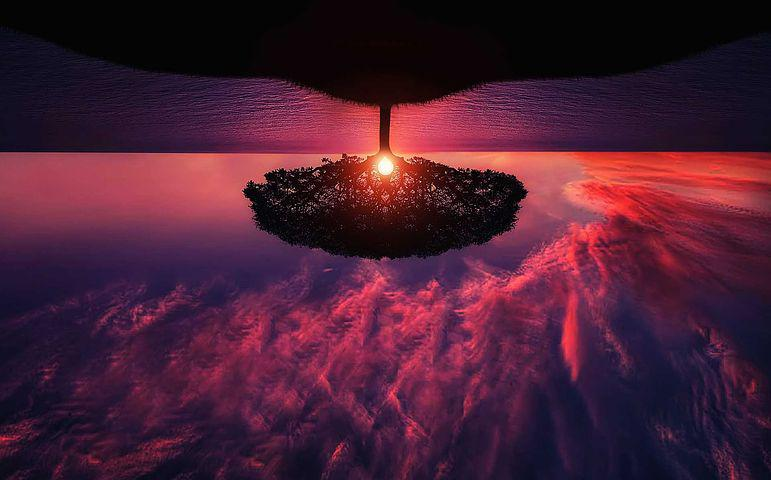

In [37]:
im1.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

In [44]:
sky = download_img('https://media.istockphoto.com/photos/summer-blue-sky-and-white-cloud-white-background-beautiful-clear-in-picture-id1328689113?k=20&m=1328689113&s=612x612&w=0&h=wa0jeR5XdaGXcD81-HyqENpLIWXc4kH2ojul0ur0gQk=')
sky.save('sky.jpg')

In [45]:
bird = download_img('https://cdn.download.ams.birds.cornell.edu/api/v1/asset/202984001/1200')
bird.save('bird.jpg')

In [46]:
bird.size, sky.size

((1200, 742), (612, 367))

In [ ]:
def blend_image(image_1,image_2,mode='RGB',size=(100,100),alpha=0.5):
    image_1 = image_1.resize(size)
    image_2 = image_2.resize(size)
    ima

In [51]:
icon=Image.open(r'C:\Users\Pc\Desktop\image\Apple-Logo-PNG-Clipart.png')
icon.show

<bound method Image.show of <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1200x750 at 0x1A8D998AE80>>

In [52]:
im1 = im1.convert('RGBA')
im1.paste(icon,(0,0))
im1.show()

In [53]:
im1.paste(icon,(200,200))
im1.show()

In [58]:
def add_watermark(image,watermark,style=None,pos=(0,0)):
    image = image.convert('RGBA')
    watermark = watermark.convert('RGBA')
    if style == 'tile':
        for x in range(0,image.width,watermark.width):
            for y in range(0, image.height,watermark.height):
                image.paste(watermark,(x,y),mask=watermark)

    elif style is None:
        image.paste(watermark,pos, mask=watermark)
    return image

In [71]:
add_watermark(icon, im2,pos=(0,0)).show()

In [64]:
from PIL import ImageFilter

In [77]:
filters = [
    ImageFilter.BLUR,
    ImageFilter.CONTOUR,
    ImageFilter.DETAIL,
    ImageFilter.EDGE_ENHANCE,
    ImageFilter.EMBOSS,
    ImageFilter.FIND_EDGES,
    ImageFilter.SMOOTH,
    ImageFilter.MaxFilter(3),
    ImageFilter.MinFilter(3),
    ImageFilter.MedianFilter(3),
    ImageFilter.GaussianBlur(30),
    ImageFilter.RankFilter(3,3),
]

for i,filter in enumerate(filters):
    bird.filter(filter).save(f'bird_{i}.png')

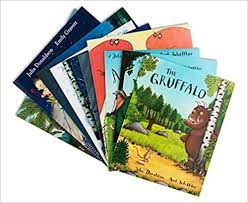

In [70]:
im2